In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plots

In [2]:
def plot_accuracies_comparison(
    accuracies_random_sharing,
    accuracies_nosharing,
    accuracies_baseline,
    p,
    cd_list,
):

    legends = []

    fig, ax = plt.subplots()

    y = np.mean(accuracies_nosharing, axis=0)
    ax.plot(y, color="red")
    legends.append("No data sharing")

    y = np.mean(accuracies_baseline, axis=0)
    ax.plot(y, color="blue")
    legends.append("IID data")

    colors = plt.cm.Set1(np.linspace(0, 1, 9))
    colors = colors[[2, 3, 4, 6, 7]]

    for i_cd, (c, d) in enumerate(cd_list):
        y = np.mean(accuracies_random_sharing[i_cd], axis=0)
        ax.plot(y, linewidth=0.9, color=colors[i_cd], linestyle="--")
        legends.append(rf"Randomized sharing $(c, d) = ({c}, {d})$")

    ax.legend(legends, loc="lower right", prop={'size': 9})
    ax.set_xlabel("Communication round", fontsize=12)
    ax.set_ylabel("Average accuracy", fontsize=12)
    ax.set_title(rf"Straggling probability $p = {p}$")
    ax.grid()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tight_layout()

    return fig, ax


def plot_moments_comparison(
    moments_random_sharing,
    moments_nosharing,
    moments_baseline,
    p,
    cd_list,
):

    legends = []

    fig, ax = plt.subplots()

    y = np.mean(moments_nosharing, axis=0)
    ax.semilogy(y, color="red")
    legends.append("No data sharing")

    y = np.mean(moments_baseline, axis=0)
    ax.semilogy(y, color="blue")
    legends.append("IID data")

    colors = plt.cm.Set1(np.linspace(0, 1, 9))
    colors = colors[[2, 3, 4, 6, 7]]

    for i_cd, (c, d) in enumerate(cd_list):
        y = np.mean(moments_random_sharing[i_cd], axis=0)
        ax.semilogy(y, linewidth=0.9, color=colors[i_cd], linestyle="--")
        legends.append(rf"Randomized sharing $(c, d) = ({c}, {d})$")

    ax.legend(legends, loc="lower left", prop={'size': 9})
    ax.set_xlabel("Communication round", fontsize=12)
    ax.set_ylabel("Average 2nd moment of gradient estimator", fontsize=12)
    ax.set_title(rf"Straggling probability $p = {p}$")
    ax.grid()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tight_layout()

    return fig, ax

In [3]:
# Parameters for plots
dpi = 400

p_cd_list = [
    (0.3, [(0.1, 2), (0.2, 2), (0.3, 2), (0.4, 2), (0.5, 2)]),
    (0.5, [(0.1, 3), (0.2, 3), (0.3, 3), (0.4, 3), (0.5, 3)]),
    (0.7, [(0.1, 4), (0.2, 4), (0.3, 4), (0.4, 4), (0.5, 4)]),
]

xlims = [[5, 20], [5, 26], [5, 32]]
ylim = [0.4, 0.75]

Plots for Dirichlet data


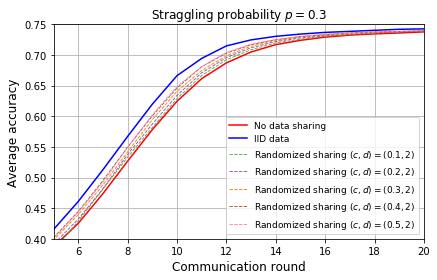

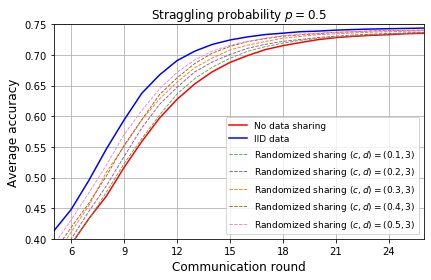

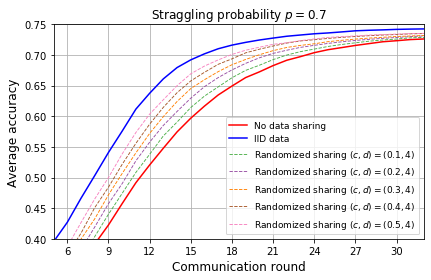

In [4]:
print("Plots for Dirichlet data")

accuracies_dirichlet_random_sharing = np.load(
    "saved/accuracies_dirichlet_random_sharing.npy"
)
accuracies_dirichlet = np.load("saved/accuracies_dirichlet.npy")
accuracies_iid = np.load("saved/accuracies_iid.npy")

for i_p, (p, cd_list) in enumerate(p_cd_list):

    xlim = xlims[i_p]

    accuracies_random_sharing = accuracies_dirichlet_random_sharing[i_p]
    accuracies_nosharing = accuracies_dirichlet[i_p]
    accuracies_baseline = accuracies_iid[i_p]

    fig, ax = plot_accuracies_comparison(
        accuracies_random_sharing, accuracies_nosharing, accuracies_baseline, p, cd_list
    )
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    plt.savefig(f"plots/dirichlet_accuracy_comparison_p_{int(100*p)}.pdf", dpi=dpi)

Plots for Dirichlet data


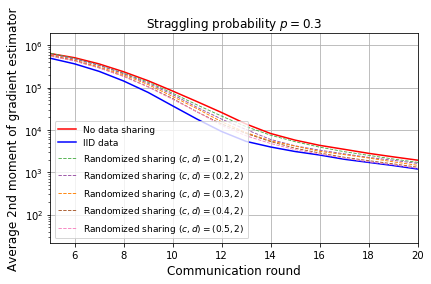

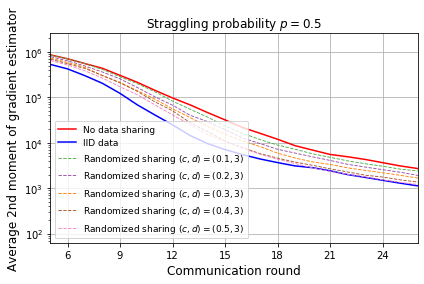

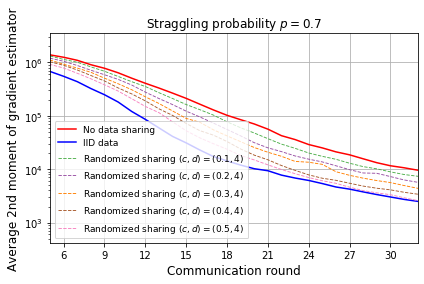

In [5]:
print("Plots for Dirichlet data")

moments_dirichlet_random_sharing = np.load("saved/moments_dirichlet_random_sharing.npy")
moments_dirichlet = np.load("saved/moments_dirichlet.npy")
moments_iid = np.load("saved/moments_iid.npy")

for i_p, (p, cd_list) in enumerate(p_cd_list):

    xlim = xlims[i_p]

    moments_random_sharing = moments_dirichlet_random_sharing[i_p]
    moments_nosharing = moments_dirichlet[i_p]
    moments_baseline = moments_iid[i_p]

    fig, ax = plot_moments_comparison(
        moments_random_sharing, moments_nosharing, moments_baseline, p, cd_list
    )
    ax.set_xlim(xlim)
    plt.savefig(f"plots/dirichlet_moments_comparison_p_{int(100*p)}.pdf", dpi=dpi)

Plots for heterogeneous data


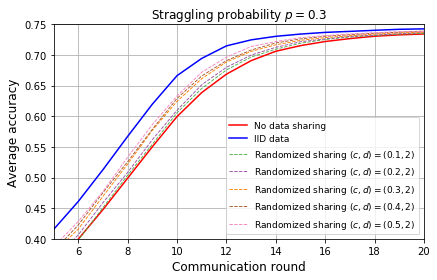

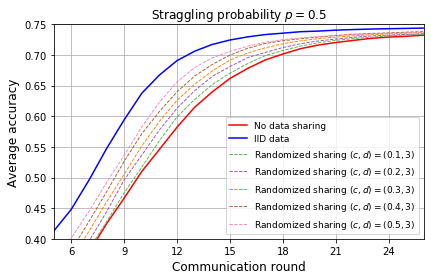

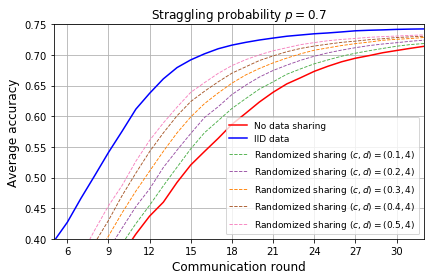

In [6]:
print("Plots for heterogeneous data")

accuracies_heterogeneous_random_sharing = np.load(
    "saved/accuracies_heterogeneous_random_sharing.npy"
)
accuracies_heterogeneous = np.load("saved/accuracies_heterogeneous.npy")
accuracies_iid = np.load("saved/accuracies_iid.npy")

for i_p, (p, cd_list) in enumerate(p_cd_list):

    xlim = xlims[i_p]

    accuracies_random_sharing = accuracies_heterogeneous_random_sharing[i_p]
    accuracies_nosharing = accuracies_heterogeneous[i_p]
    accuracies_baseline = accuracies_iid[i_p]

    fig, ax = plot_accuracies_comparison(
        accuracies_random_sharing, accuracies_nosharing, accuracies_baseline, p, cd_list
    )
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    plt.savefig(f"plots/heterogeneous_accuracy_comparison_p_{int(100*p)}.pdf", dpi=dpi)

Plots for heterogeneous data


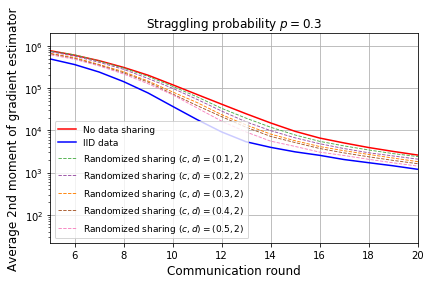

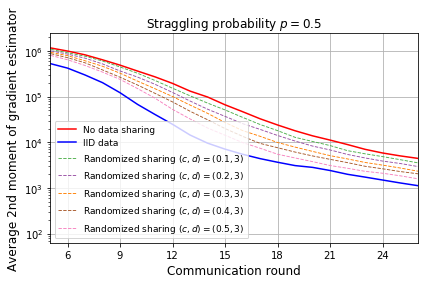

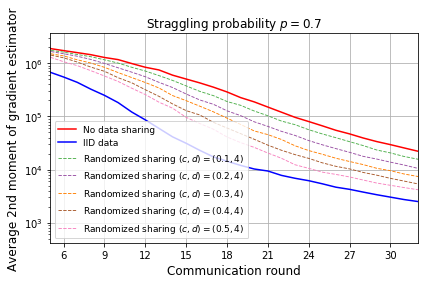

In [7]:
print("Plots for heterogeneous data")

moments_heterogeneous_random_sharing = np.load(
    "saved/moments_heterogeneous_random_sharing.npy"
)
moments_heterogeneous = np.load("saved/moments_heterogeneous.npy")
moments_iid = np.load("saved/moments_iid.npy")

for i_p, (p, cd_list) in enumerate(p_cd_list):

    xlim = xlims[i_p]

    moments_random_sharing = moments_heterogeneous_random_sharing[i_p]
    moments_nosharing = moments_heterogeneous[i_p]
    moments_baseline = moments_iid[i_p]

    fig, ax = plot_moments_comparison(
        moments_random_sharing, moments_nosharing, moments_baseline, p, cd_list
    )
    ax.set_xlim(xlim)
    plt.savefig(f"plots/heterogeneous_moments_comparison_p_{int(100*p)}.pdf", dpi=dpi)